In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
def loadLog(bs: int, arch: str, idx: int) -> pd.DataFrame:
    df = pd.read_csv(f"birds-{arch}-bs{bs}-{idx}.csv")
    # change the time to seconds
    # since no training epoch took more than 1 minute 
    # we will cheat and simply trim the minutes away
    df['time'] = df.apply(lambda df: int(df['time'].split(':')[1]), axis=1)
    return df

In [3]:
def loadMergedLog(bs: int, arch: str) -> pd.DataFrame:
    dfs = map(lambda idx: loadLog(bs, arch, idx), range(10))
    merged = pd.concat(dfs)
    return merged.groupby(merged.index).mean()

In [6]:
def plotResults(arch: str, y_axis: str):
    fig, ax = plt.subplots()

    fig.set_size_inches(20,15)


    blockSizes = [128, 64, 32, 16, 8, 4]

    for bs in blockSizes:
        frame = loadMergedLog(bs, arch)
        plt.plot(frame['epoch'], frame[y_axis])
        ax.legend(blockSizes);

    ax.legend(blockSizes);
    plt.xlim(0,9)
    plt.show()

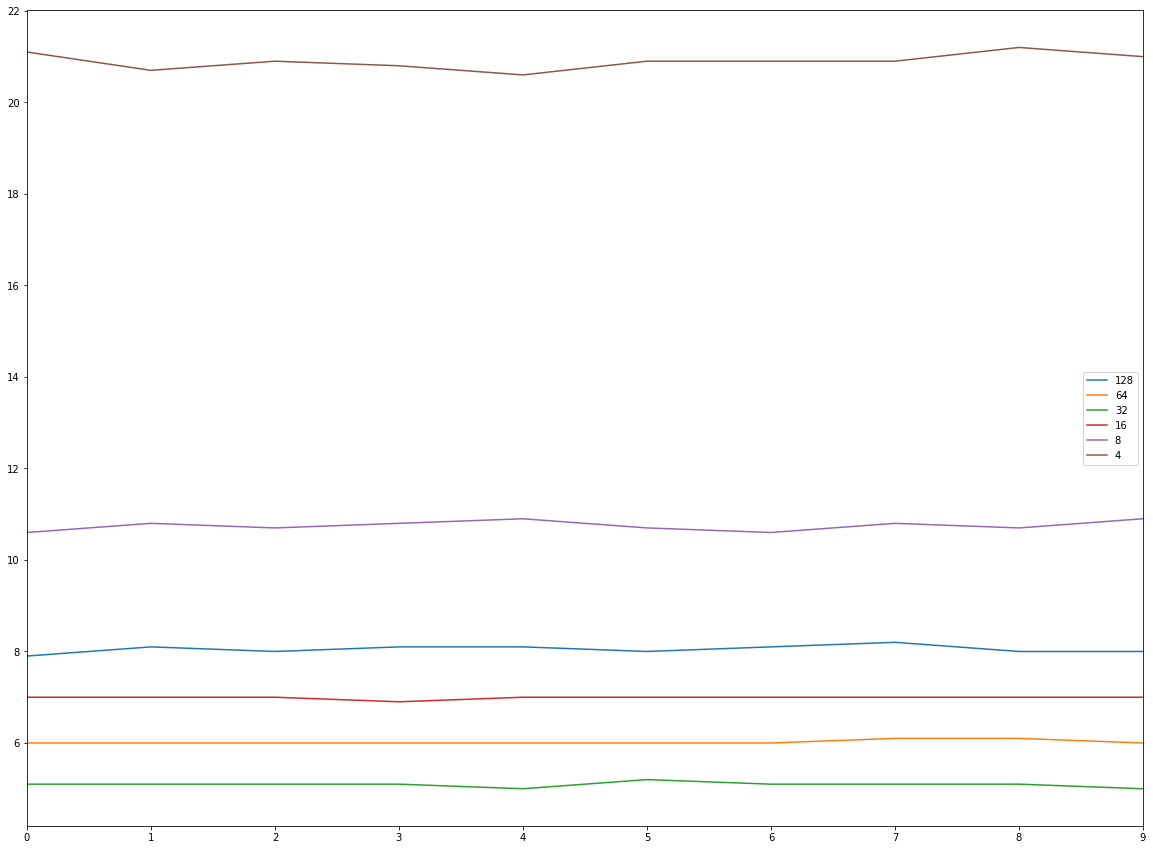

In [83]:
plotResults('rn18', 'time')